<a href="https://colab.research.google.com/github/timothyllata/fifa-analysis/blob/main/FifaAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fifa_players.csv to fifa_players.csv


In [ ]:
import pandas as pd

df = pd.read_csv(next(iter(uploaded)))
df.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


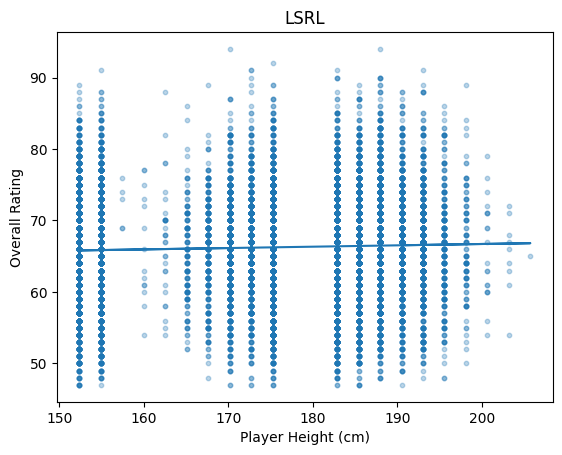

0.03807987326948085


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(next(iter(uploaded)))

x = df["height_cm"]
y = df["overall_rating"]

m, b = np.polyfit(x, y, 1)
# s controls the dot size, and alpha controls the dot opacity
plt.scatter(x, y, s = 10, alpha = 0.3)
plt.plot(x, m*x + b)

plt.xlabel("Player Height (cm)")
plt.ylabel("Overall Rating")
plt.title("LSRL")
plt.show()
# Correlation coefficient calculation. Expected near 0.
r = np.corrcoef(x, y)[0, 1]
print(r)

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv(next(iter(uploaded)))
lst = []
y = df["value_euro"]
max = 0
max_skill = ""
all_correlations = []
for skill in df.columns[23:]:
  x = df[skill]
  valid = x.notna() & y.notna()
  r = np.corrcoef(x[valid], y[valid])[0, 1]
  # print(r,skill)
  all_correlations.append(r)
  if r > max:
    max = r
    max_skill = skill
print(max)
print(max_skill)
skills_df = pd.DataFrame({
    "Skill": df.columns[23:],
    "Correlation": all_correlations
}).sort_values(by = "Correlation", ascending = False)
skills_df


0.547614557779529
reactions


,Skill,Correlation
12,reactions,0.547615
24,composure,0.456538
22,vision,0.363445
2,short_passing,0.329467
8,ball_control,0.309655
7,long_passing,0.306941
3,volleys,0.291412
5,curve,0.289540
14,shot_power,0.284693
18,long_shots,0.284085


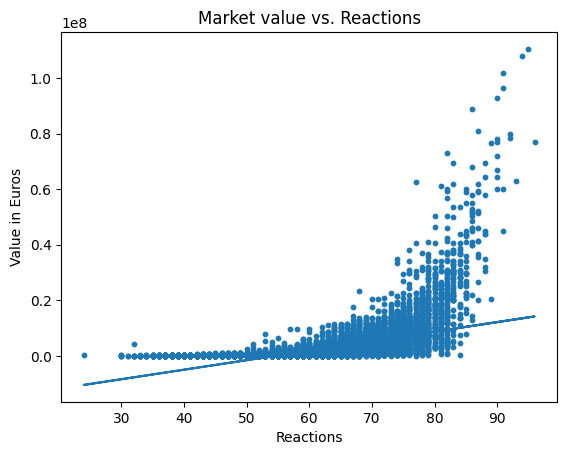

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(next(iter(uploaded)))

x = df["reactions"]
y = df["value_euro"]
valid = x.notna() & y.notna()

m, b = np.polyfit(x[valid], y[valid], 1)
plt.scatter(x[valid], y[valid], s = 10)
plt.plot(x[valid], m*x[valid] + b)
plt.xlabel("Reactions")
plt.ylabel("Value in Euros")
plt.title("Market value vs. Reactions")
plt.show()



In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

df = pd.read_csv(next(iter(uploaded)))

skill_cols = df.columns[23:]
results = []

for col in skill_cols:
  left_val = df[df["preferred_foot"] == "Left"][col].dropna()
  right_val = df[df["preferred_foot"] == "Right"][col].dropna()

  t, p = ttest_ind(left_val, right_val, equal_var=False)

  results.append({
      "skill": col,
      "left mean": left_val.mean(),
      "right mean": right_val.mean(),
      "t-value": t,
      "p-value": p,
  })

results_df = pd.DataFrame(results)
results_df.sort_values("p-value").head()

,skill,left mean,right mean,t-value,p-value
5,curve,52.578241,45.442638,22.781925,5.140852e-111
4,dribbling,59.975318,53.856904,20.853473,2.806665e-94
6,freekick_accuracy,47.569135,41.210072,20.726281,1.286299e-92
8,ball_control,61.914450,57.106378,18.753084,5.421699e-77
9,acceleration,67.940570,63.713809,17.572103,7.419004e-68


In [ ]:
import pandas as pd

df = pd.read_csv(next(iter(uploaded)))
country_skills = df.groupby("nationality")[df.columns[23:]].mean()
for skill in country_skills.columns:
  best = country_skills[skill].idxmax()
  val = country_skills[skill].max()
  print(f"{skill}: {best} {val}")

finishing: São Tomé & Príncipe 71.0
heading_accuracy: Andorra 70.0
short_passing: Kuwait 78.0
volleys: Eritrea 69.0
dribbling: United Arab Emirates 80.0
curve: United Arab Emirates 77.0
freekick_accuracy: United Arab Emirates 75.0
long_passing: United Arab Emirates 77.0
ball_control: United Arab Emirates 76.0
acceleration: Libya 85.33333333333333
sprint_speed: Tanzania 84.0
agility: United Arab Emirates 87.0
reactions: São Tomé & Príncipe 75.0
balance: Vietnam 87.0
shot_power: São Tomé & Príncipe 81.0
jumping: Guam 82.0
stamina: Barbados 78.0
strength: New Caledonia 84.0
long_shots: Dominican Republic 72.5
aggression: Guam 73.0
interceptions: New Caledonia 74.0
positioning: Eritrea 73.0
vision: United Arab Emirates 80.0
penalties: Eritrea 66.5
composure: Kuwait 73.0
marking: New Caledonia 67.0
standing_tackle: New Caledonia 70.0
sliding_tackle: New Caledonia 69.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

df = pd.read_csv(next(iter(uploaded)))
X = df[df.columns[23:]]
y = df["value_euro"]
# X.head()
# y.head()
X = X.fillna(X.mean())
y = y.fillna(y.mean())
# X.isna().sum().sum()
# y.isna().sum().sum()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
# X_train.shape
# X_test.shape
# y_train.shape
# y_test.shape
model = RandomForestRegressor(n_estimators=200, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(r2)
print(rmse)
avg_val = y_test.mean()
median = y_test.median()
print(rmse/avg_val * 100)
print(rmse/median * 100)

0.8507010586602894
2196342.1111165285
88.67965698430726
302.9437394643487


In [ ]:
!pip install xgboost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor
import numpy as np

df = pd.read_csv(next(iter(uploaded)))

X = df[df.columns[23:]]
y = df["value_euro"]
X = X.fillna(X.mean())
y = y.fillna(y.mean())
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 1
)
model = XGBRegressor(
    n_estimators = 200,
    max_depth = 5,
    learning_rate = 0.05,
    subsample = 0.8,
    colsample_bytree = 0.8,
    reg_alpha = 0.1,
    random_state = 1
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(r2)
print(rmse)
y_pred_train = model.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print(r2_train)
print(rmse_train)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(cv_scores)
importances = model.feature_importances_
skills = X.columns
importances_df = pd.DataFrame({
    "Skills": skills,
    "Importance": importances
}).sort_values(by = "Importance", ascending = False)
importances_df

0.8775777867620262
1988848.6632578946
0.9689903389324832
992616.8319747938
[0.87828325 0.88642614 0.89336577 0.90169496 0.90745487]


,Skills,Importance
12,reactions,0.362495
8,ball_control,0.209034
26,standing_tackle,0.068779
24,composure,0.035939
4,dribbling,0.030473
21,positioning,0.026954
27,sliding_tackle,0.024559
16,stamina,0.024168
2,short_passing,0.024064
22,vision,0.023768
